**Breast Cancer DataSet**

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import statistics
from sklearn.preprocessing import MinMaxScaler

In [8]:
cancer = load_breast_cancer()
target_names = cancer.target_names
feature_names = cancer.feature_names

In [10]:
print(target_names)
print(feature_names)
print(cancer.target[15:40])# we print a subset of the whole target

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [11]:
print(cancer.DESCR) #description of the dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [13]:
print(f'Shape of the data: {cancer.data.shape}')

Shape of the data: (569, 30)


In [16]:
vertical_pos = range(len(feature_names))
featureAverage = []
featureVariation= []
scaler = MinMaxScaler() #We adjust the data to be able to make the right comparisons between features
scaler.fit(cancer.data)
cancer_scaled = scaler.transform(cancer.data)
for i in range (len(feature_names)):
  featureAverage.append(statistics.mean(cancer_scaled[:,i]))
  featureVariation.append(statistics.variance(cancer_scaled[:,i]))

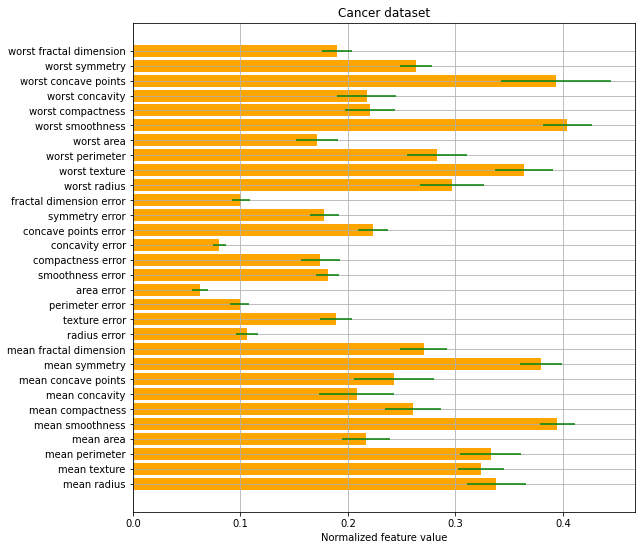

In [22]:
fig, ax = plt.subplots(figsize = (9,9))
ax.barh(vertical_pos, featureAverage,xerr=featureVariation, color='orange', ecolor='green')
ax.set_yticks(vertical_pos)
ax.set_yticklabels(feature_names)
ax.set_xlabel('Normalized feature value')
ax.set_title('Cancer dataset')
plt.rcParams.update({'font.size':7});
ax.grid()
plt.show ()